In [8]:
'''
Function ->  

function: 10*(x-10)^4+3*(y-7)^2
function: Max(x-10,0)+3*|y-7|


'''

'\nFunction ->  \n\nfunction: 10*(x-10)^4+3*(y-7)^2\nfunction: Max(x-10,0)+3*|y-7|\n\n\n'

In [9]:
import sympy as sp 
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy

def calculate_derivatives():
    x, y = sp.symbols('x y', real=True)
    # The First Function

    f1 = (10 * ((x - 10) ** 4)) + (3 * ((y - 7) ** 2))
    df1_x = sp.diff(f1, x)
    df1_y = sp.diff(f1, y)
    print(f1)
    print(df1_x)
    print(df1_y)
    # The second Function

    f2 = sp.Max(x - 10, 0) + (3 * sp.Abs(y - 7))
    df2_x = sp.diff(f2, x)
    df2_y = sp.diff(f2, y)
    print(f2)
    print(df2_x)
    print(df2_y)

def polyak(df,x0,f,epsilon = 1e-8):
    # standard code 
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)],[]

    #report
    for _ in range(150):
        count = 0
        for i in range(n):
            count = sum(df[i](x[i])**2)
        step = f(*x) / (count + epsilon)
        for i in range(n):
            x[i] -= step * df[i](x[i])
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(step)
    return x_list, f_list, step_list

def RMSprop(f, df, x0, parameters, iterations=100):
    alpha0, beta = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list ,step_list = [deepcopy(x)], [f(*x)], [[alpha0] * n]
    # defining the constant parameter of epsilon to account for division by zero 
    epsilon = 1e-8
    sums = [0] * n
    alphas = [alpha0] * n
    for _ in range(iterations):
        for i in range(n):
            x[i] -= alphas[i] * df[i](x[i])
            sums[i] = (beta * sums[i]) + ((1 - beta) * (df[i](x[i]) ** 2))
            alphas[i] = alpha0 / ((sums[i] ** 0.5) + epsilon)
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(deepcopy(alphas))
    return x_list, f_list ,step_list
    

def HeavyBall(f, df, x0, parameters, iterations=100):
    alpha, beta = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], [0]
    # defining the constant parameter of epsilon to account for division by zero 
    epsilon = 1e-8
    z = 0
    for _ in range(iterations):
        
        z = (beta * z) + (alpha * f(*x) / (sum(df[j](x[j]) ** 2 for j in range(n)) + epsilon))
        for i in range(n):
            x[i] -= z * df[i](x[i])
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(z)
    return x_list, f_list, step_list

def Adam(f,df,x0,parameters,iterations=100):
    alpha,beta1,beta2 = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], [[0] * n]
    # defining the constant parameter of epsilon to account for division by zero 
    epsilon = 1e-8
    ms = [0] * n
    vs = [0] * n
    step = [0] * n
    t = 0
    for _ in range(iterations):
        t += 1
        for i in range(n):
            ms[i] = (beta1 * ms[i]) + ((1 - beta1) * df[i](x[i]))
            vs[i] = (beta2 * vs[i]) + ((1 - beta2) * (df[i](x[i]) ** 2))
            m_hat = ms[i] / (1 - (beta1 ** t))
            v_hat = vs[i] / (1 - (beta2 ** t))
            step[i] = alpha * (m_hat / ((v_hat ** 0.5) + epsilon))
            x[i] -= step[i]
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(deepcopy(step))
    return x_list, f_list, step_list




In [12]:
def B1(f,df,x,fnum):
    alpha0s = [0.001,0.01,0.1]
    betas = [0.25,0.9]
    iterations = 200
    iters = list(range(iterations + 1))
    legend = []
    for alpha0 in alpha0s:
        for beta in betas:
            xs, values, steps = RMSprop(f, df, x, [alpha0, beta], iterations=iterations)
            print(f'alpha0={alpha0}, beta={beta}: final_value={values[-1]}')
            plt.figure(1)
            plt.plot(iters, values)
            stepsx = [step[0] for step in steps]
            stepsy = [step[1] for step in steps]
            plt.figure(2)
            plt.plot(iters, stepsx)
            plt.figure(3)
            plt.plot(iters, stepsy)
    plt.figure(1)
    plt.xlabel('iterations')
    plt.ylabel(f'$f_{fnum}(x,y)$')
    plt.title(f'RMSProp for $f_{fnum}(x,y)$')
    if fnum == 1: plt.ylim([0, 100])
    plt.legend(legend)
    plt.figure(2)
    plt.xlabel('iterations')
    plt.ylabel('step $x$')
    plt.title(f'Step size of $x$ for $f_{fnum}$')
    plt.figure(3)
    plt.xlabel('iterations')
    plt.ylabel('step $y$')
    plt.title(f'Step size of $y$ for $f_{fnum}$')
    plt.show()

def B2(f, df, x, fnum):
    alphas = [0.01,0.1,1]
    betas = [0.25,0.9]
    iterations = 200
    iters = list(range(iterations + 1))
    legend = []
    contour_data = []
    for alpha in alphas:
        for beta in betas:
            xs, values, steps = HeavyBall(f, df, x, [alpha, beta], iterations=iterations)
            legend.append(f'$\\alpha={alpha},\\, \\beta={beta}$')
            print(f'alpha={alpha}, beta={beta}: final_value={values[-1]}')
            plt.plot(iters, values)
    plt.xlabel('iterations')
    plt.ylabel(f'$f_{fnum}(x,y)$')
    plt.title(f'Heavy Ball for $f_{fnum}(x,y)$')
    if fnum == 1: plt.ylim([0, 200])
    else: plt.ylim([0, 30])
    plt.legend(legend)
    plt.show()

def B3(f, df, x, fnum):
    alphas = [0.01, 0.1, 1]
    beta1s = [0.25, 0.9]
    beta2s = [0.9, 0.999]
    iterations = 200
    iters = list(range(iterations + 1))
    legend = []
    for beta2 in beta2s:
        for alpha in alphas:
            for beta1 in beta1s:
                xs, values, steps = Adam(f, df, x, [alpha, beta1, beta2], iterations=iterations)
                legend.append(f'$\\alpha={alpha},\\, \\beta_1={beta1}$')
                print(f'alpha={alpha}, beta1={beta1}, beta2={beta2}: final_value={values[-1]}')
                plt.figure(1)
                plt.plot(iters, values)
                stepsx = [step[0] for step in steps]
                stepsy = [step[1] for step in steps]
                plt.figure(2)
                plt.plot(iters, stepsx)
                plt.figure(3)
                plt.plot(iters, stepsy)
        plt.figure(1)
        plt.xlabel('iterations')
        plt.ylabel(f'$f_{fnum}(x,y)$')
        plt.title(f'Adam for $f_{fnum}(x,y),\\, \\beta_2={beta2}$')
        plt.legend(legend)
        plt.figure(2)
        plt.xlabel('iterations')
        plt.ylabel('step $x$')
        plt.title(f'Step size of $x$ for $f_{fnum},\\, \\beta_2={beta2}$')
        plt.figure(3)
        plt.xlabel('iterations')
        plt.ylabel('step $y$')
        plt.title(f'Step size of $y$ for $f_{fnum},\\, \\beta_2={beta2}$')
        plt.show()




def B():
    function_1 = lambda x,y : 10*(x - 10)**4 + 3*(y - 7)**2 
    df1_x = lambda x: 40*(x - 10)**3
    df1_y = lambda y: 6*y - 42
    function_2 = lambda x, y: 3*abs(y - 7) + max(0, x - 10)
    df2_x = lambda x: np.heaviside(x - 10, 0)
    df2_y = lambda y: 3*np.sign(y - 7)
    print('(b)(i) function 1')
    B1(function_1,[df1_x,df1_y],[3,0],1)
    print('(b)(i) function 2')
    B1(function_2,[df2_x,df2_y],[3,0],2)
    print('(b)(ii) function_1')
    B2(function_1, [df1_x, df1_y], [3, 0], 1)
    print('(b)(ii) function_2')
    B2(function_2, [df2_x, df2_y], [3, 0], 2)
    print('(b)(iii) function_1')
    B3(function_1, [df1_x, df1_y], [3, 0], 1)
    print('(b)(iii) function_2')
    B3(function_2, [df2_x, df2_y], [3, 0], 2)


10*(x - 10)**4 + 3*(y - 7)**2
40*(x - 10)**3
6*y - 42
3*Abs(y - 7) + Max(0, x - 10)
Heaviside(x - 10)
3*sign(y - 7)
(b)(i) function 1
alpha0=0.001, beta=0.25: final_value=18217.609867742718
alpha0=0.001, beta=0.9: final_value=18126.540763015037
alpha0=0.01, beta=0.25: final_value=2701860073.4215145
alpha0=0.01, beta=0.9: final_value=2694651793.10001
alpha0=0.1, beta=0.25: final_value=32733662563847.867
alpha0=0.1, beta=0.9: final_value=32650245631004.348


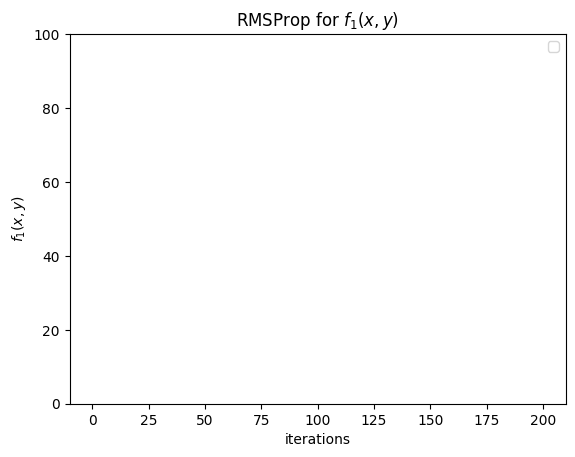

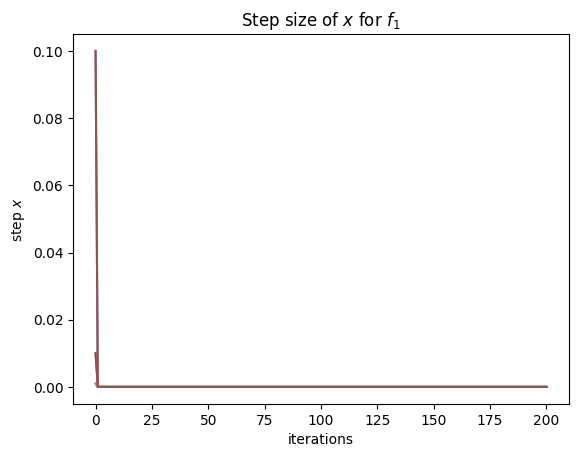

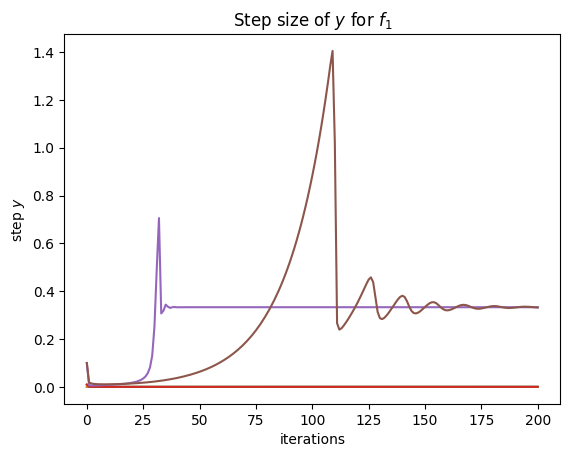

(b)(i) function 2
alpha0=0.001, beta=0.25: final_value=20.393405967050526
alpha0=0.001, beta=0.9: final_value=20.366574862050932
alpha0=0.01, beta=0.25: final_value=14.934059670505277
alpha0=0.01, beta=0.9: final_value=14.665748620509296
alpha0=0.1, beta=0.25: final_value=0.05940342694718481
alpha0=0.1, beta=0.9: final_value=0.260641323261833


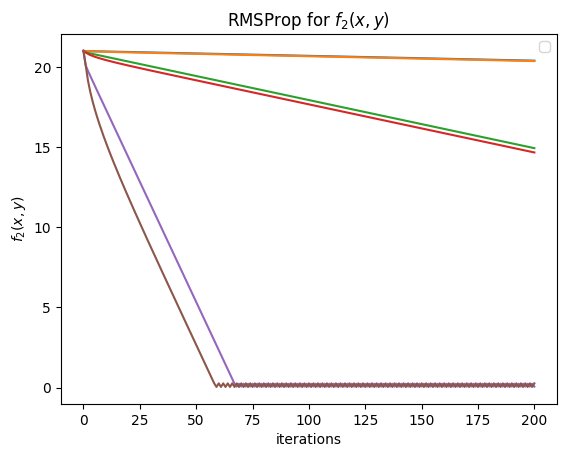

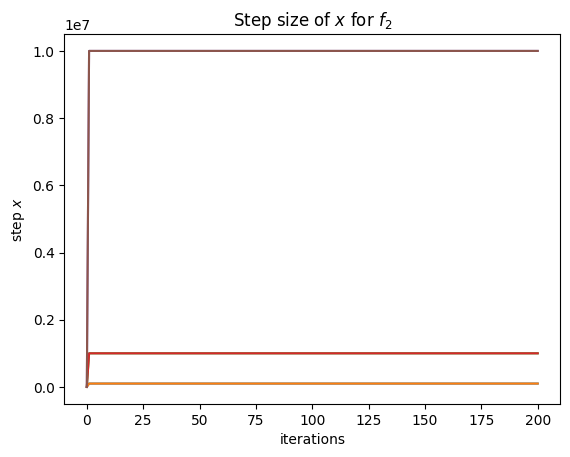

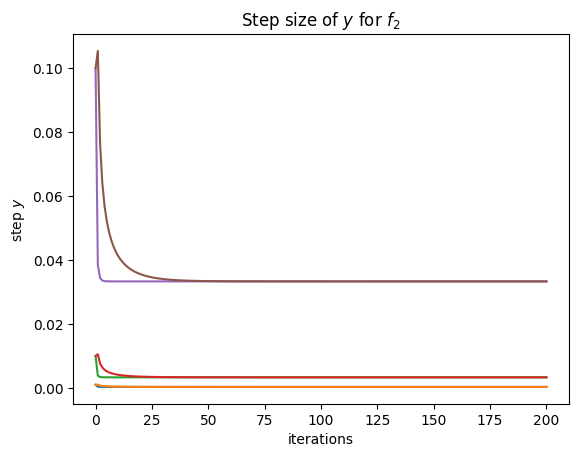

(b)(ii) function_1
alpha=0.01, beta=0.25: final_value=1689.9875605123352
alpha=0.01, beta=0.9: final_value=0.002959970400623624
alpha=0.1, beta=0.25: final_value=1.0755717063914834e-06
alpha=0.1, beta=0.9: final_value=5.949231452989589e-07
alpha=1, beta=0.25: final_value=5.608636072530092e-07
alpha=1, beta=0.9: final_value=8.187715403363105e+220


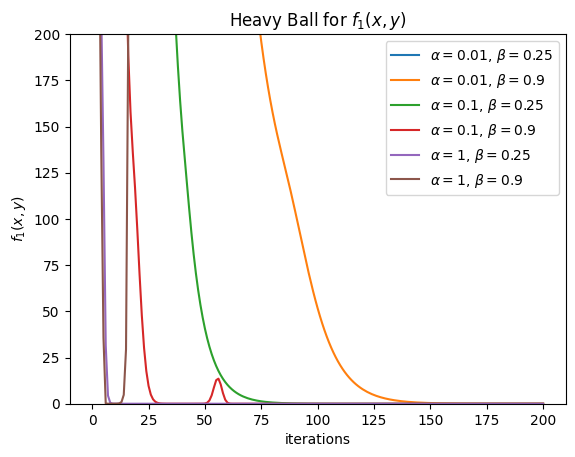

(b)(ii) function_2
alpha=0.01, beta=0.25: final_value=1.422264272975685
alpha=0.01, beta=0.9: final_value=1.382997449894674e-08
alpha=0.1, beta=0.25: final_value=1.3988810110276972e-12
alpha=0.1, beta=0.9: final_value=0.00015618102571224313
alpha=1, beta=0.25: final_value=0.0
alpha=1, beta=0.9: final_value=9.917518419079399e+35


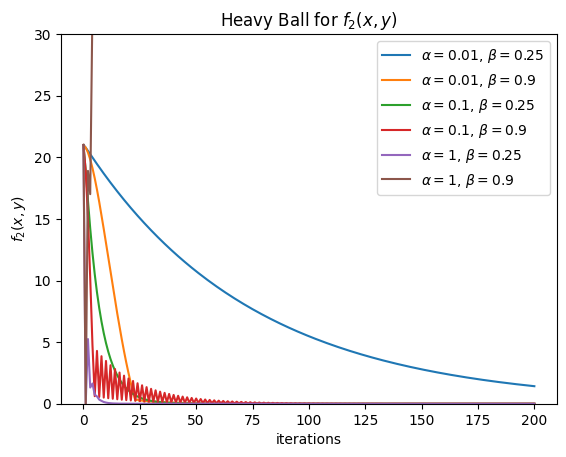

(b)(iii) function_1
alpha=0.01, beta1=0.25, beta2=0.9: final_value=6726.16281184316
alpha=0.01, beta1=0.9, beta2=0.9: final_value=6335.4817071328425
alpha=0.1, beta1=0.25, beta2=0.9: final_value=0.0013034794829710563
alpha=0.1, beta1=0.9, beta2=0.9: final_value=2.8275127828693054e-05
alpha=1, beta1=0.25, beta2=0.9: final_value=1.3071006127586413
alpha=1, beta1=0.9, beta2=0.9: final_value=0.005405724443330003


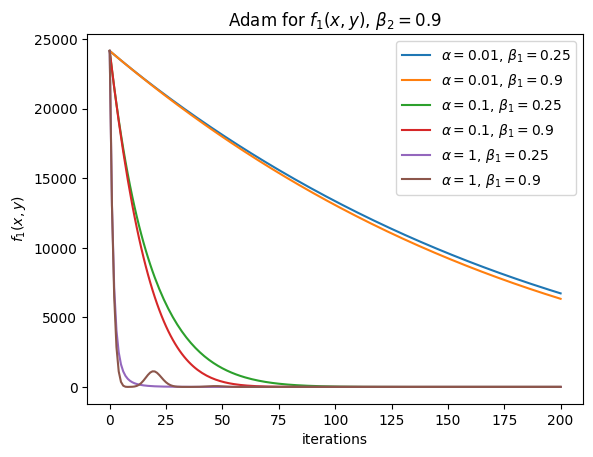

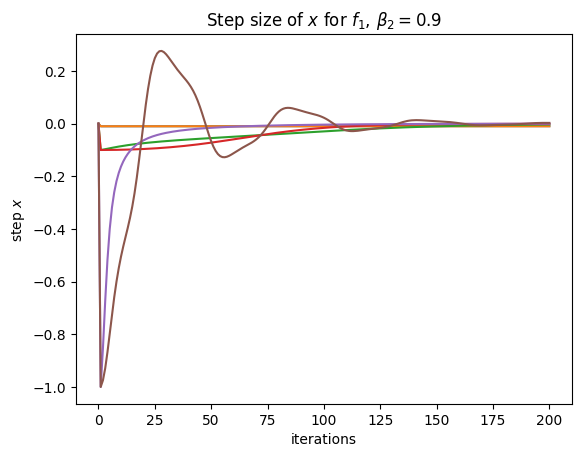

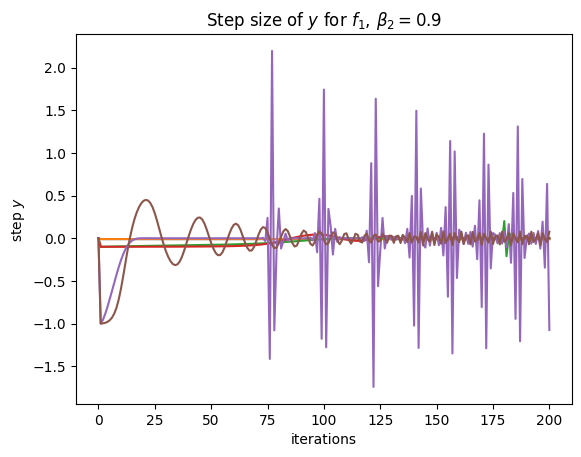

alpha=0.01, beta1=0.25, beta2=0.999: final_value=8395.163493177412
alpha=0.01, beta1=0.9, beta2=0.999: final_value=8131.673837144448
alpha=0.1, beta1=0.25, beta2=0.999: final_value=86.37759550276978
alpha=0.1, beta1=0.9, beta2=0.999: final_value=52.270444984342895
alpha=1, beta1=0.25, beta2=0.999: final_value=0.1259946320662415
alpha=1, beta1=0.9, beta2=0.999: final_value=0.012002001591184515


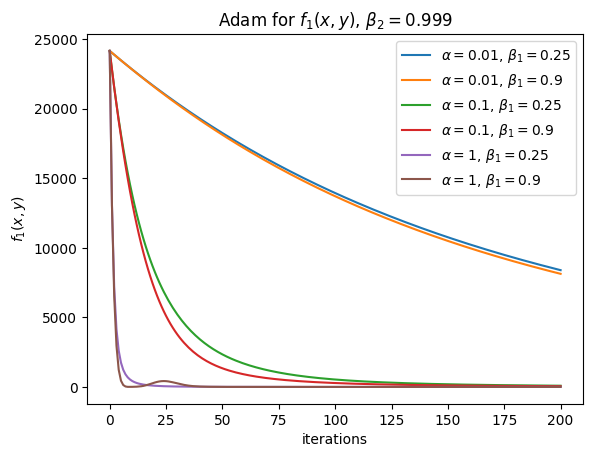

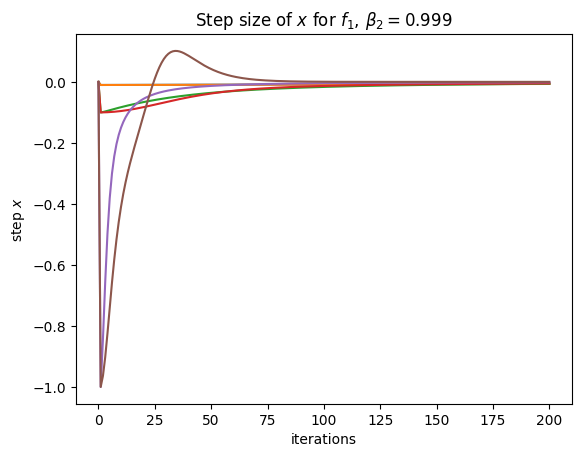

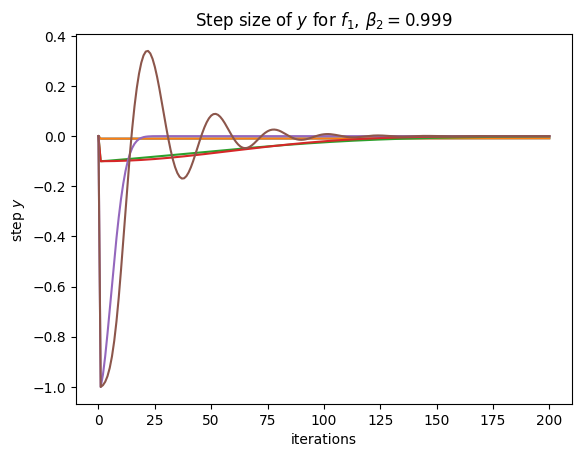

(b)(iii) function_2
alpha=0.01, beta1=0.25, beta2=0.9: final_value=15.000000019999996
alpha=0.01, beta1=0.9, beta2=0.9: final_value=15.000000019999996
alpha=0.1, beta1=0.25, beta2=0.9: final_value=0.03999992986663781
alpha=0.1, beta1=0.9, beta2=0.9: final_value=0.07528551501389913
alpha=1, beta1=0.25, beta2=0.9: final_value=1.400023258763337
alpha=1, beta1=0.9, beta2=0.9: final_value=0.7470873281809522


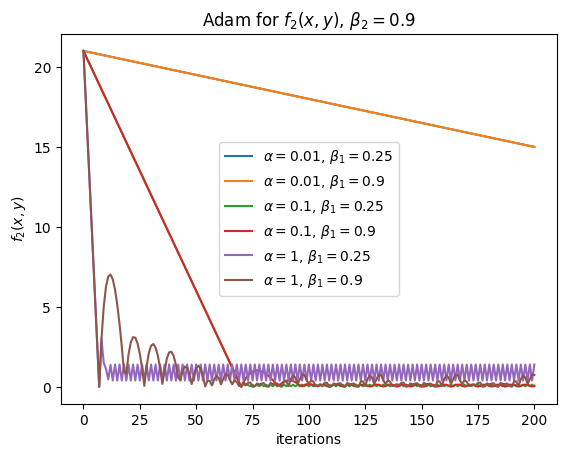

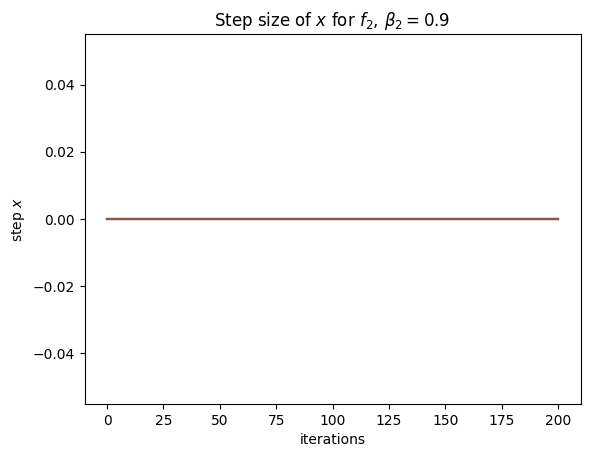

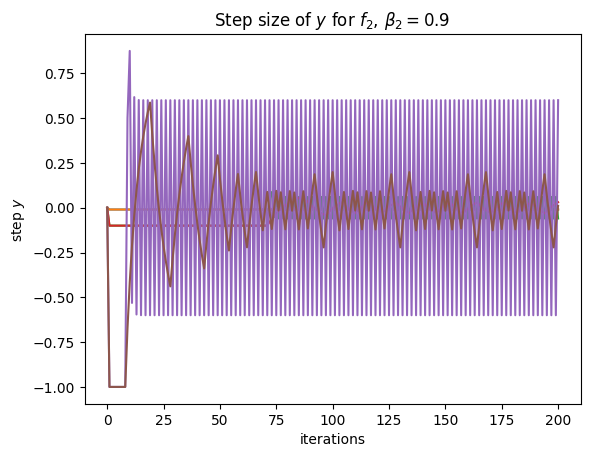

alpha=0.01, beta1=0.25, beta2=0.999: final_value=15.000000019999996
alpha=0.01, beta1=0.9, beta2=0.999: final_value=15.000000019999996
alpha=0.1, beta1=0.25, beta2=0.999: final_value=0.03999992986662715
alpha=0.1, beta1=0.9, beta2=0.999: final_value=0.07528551501390712
alpha=1, beta1=0.25, beta2=0.999: final_value=1.4000232587633663
alpha=1, beta1=0.9, beta2=0.999: final_value=0.7470873281809043


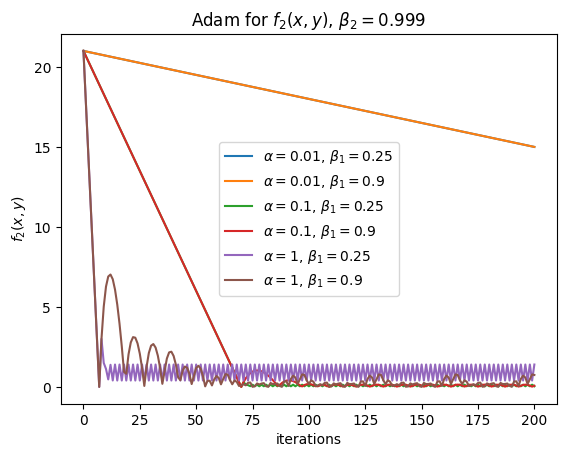

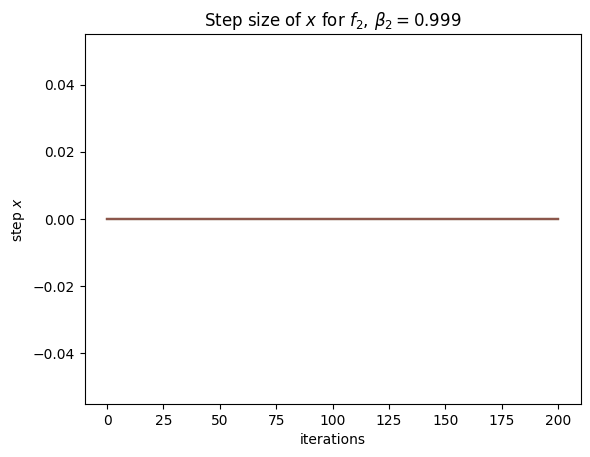

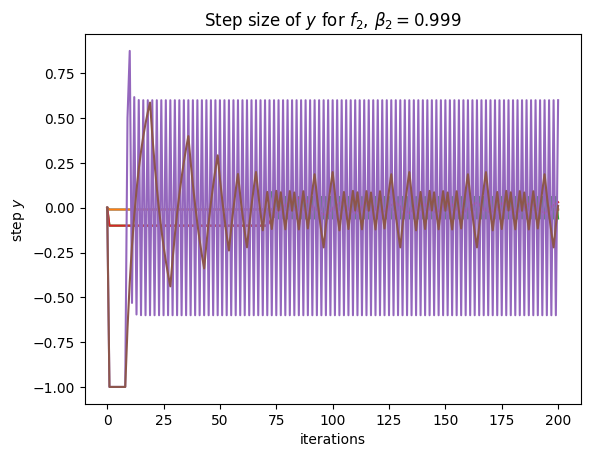

In [13]:
calculate_derivatives()
B()

# Getting Final Code Together


Optimizing f1 with RMSProp


TypeError: execute_optimization_scenarios.<locals>.<lambda>() missing 1 required positional argument: 'y'

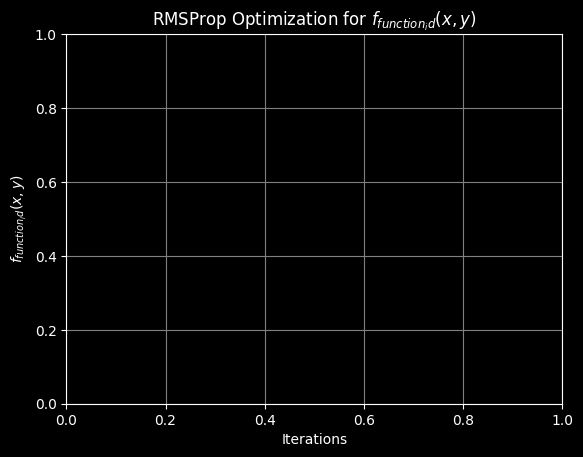

In [45]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

def calculate_derivatives():
    x, y = sp.symbols('x y', real=True)
    f1 = (1 * ((x - 1) ** 4)) + (8 * ((y - 1) ** 2))
    df1_x = sp.diff(f1, x)
    df1_y = sp.diff(f1, y)
    f2 = sp.Max(x - 1, 0) + (8 * sp.Abs(y - 1))
    df2_x = sp.diff(f2, x)
    df2_y = sp.diff(f2, y)

def RMSprop(f, df, x0, parameters, iterations=100):
    alpha0, beta = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], []
    epsilon = 1e-8
    sums = [0] * n
    alphas = [alpha0] * n
    for _ in range(iterations):
        for i in range(n):
            x[i] -= alphas[i] * df[i](x[i])
            sums[i] = beta * sums[i] + (1 - beta) * (df[i](x[i]) ** 2)
            alphas[i] = alpha0 / (np.sqrt(sums[i]) + epsilon)
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(alphas)
    return x_list, f_list, step_list

def HeavyBall(f, df, x0, parameters, iterations=100):
    alpha, beta = parameters
    x = deepcopy(x0)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], []
    epsilon = 1e-8
    z = 0
    for _ in range(iterations):
        z = beta * z + alpha * f(*x) / (sum(df[j](x[j]) ** 2 for j in range(n)) + epsilon)
        for i in range(n):
            x[i] -= z * df[i](x[i])
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(z)
    return x_list, f_list, step_list

def Adam(f, df, x0, parameters, iterations=100):
    alpha, beta1, beta2 = parameters
    x = deepcopy(x0)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], []
    epsilon = 1e-8
    ms = [0] * n
    vs = [0] * n
    t = 0
    for _ in range(iterations):
        t += 1
        for i in range(n):
            ms[i] = beta1 * ms[i] + (1 - beta1) * df[i](x[i])
            vs[i] = beta2 * vs[i] + (1 - beta2) * (df[i](x[i]) ** 2)
            m_hat = ms[i] / (1 - beta1 ** t)
            v_hat = vs[i] / (1 - beta2 ** t)
            step[i] = alpha * m_hat / (np.sqrt(v_hat) + epsilon)
            x[i] -= step[i]
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(step)
    return x_list, f_list, step_list

def optimize_f1(f, gradient_funcs, initial_point, function_id):
    learning_rates = [0.001, 0.01, 0.1]
    decay_factors = [0.25, 0.9]
    max_iterations = 200
    iteration_steps = list(range(max_iterations + 1))
    
    plt.figure(facecolor='black')
    plt.xlabel('Iterations', color='white')
    plt.ylabel(f'$f_{{function_id}}(x,y)$', color='white')
    plt.title(f'RMSProp Optimization for $f_{{function_id}}(x,y)$', color='white')
    plt.grid(color='gray')
    plt.tick_params(colors='white')
    
    function_values_all = []
    
    for rate in learning_rates:
        for decay in decay_factors:
            _, function_values, _ = RMSprop(f, gradient_funcs, initial_point, [rate, decay], max_iterations)
            plt.plot(iteration_steps, function_values, label=f'lr={rate}, decay={decay}')
            function_values_all.extend(function_values)
    
    plt.ylim([min(function_values_all) - 1, max(function_values_all) + 1])
    plt.legend(facecolor='black', edgecolor='white', fontsize='medium')
    plt.show()

def optimize_f2(f, gradient_funcs, initial_point, function_id):
    alphas = [0.01, 0.1, 1]
    betas = [0.25, 0.9]
    max_iterations = 200
    iteration_steps = list(range(max_iterations + 1))
    
    for alpha in alphas:
        for beta in betas:
            _, function_values, _ = HeavyBall(f, gradient_funcs, initial_point, [alpha, beta], max_iterations)
            plt.plot(iteration_steps, function_values, label=f'alpha={alpha}, beta={beta}')
    
    plt.xlabel('Iterations')
    plt.ylabel(f'$f_{{function_id}}(x,y)$')
    plt.title(f'Heavy Ball Optimization for $f_{{function_id}}(x,y)$')
    plt.legend()
    plt.show()

def optimize_f3(f, gradient_funcs, initial_point, function_id):
    alphas = [0.01, 0.1, 1]
    beta1s = [0.25, 0.9]
    beta2s = [0.9, 0.999]
    max_iterations = 200
    
    for beta2 in beta2s:
        for alpha in alphas:
            for beta1 in beta1s:
                _, function_values, _ = Adam(f, gradient_funcs, initial_point, [alpha, beta1, beta2], max_iterations)
                plt.plot(list(range(len(function_values))), function_values, label=f'alpha={alpha}, beta1={beta1}, beta2={beta2}')
        plt.xlabel('Iterations')
        plt.ylabel(f'$f_{{function_id}}(x,y)$')
        plt.title(f'Adam Optimization for $f_{{function_id}}(x,y)$, beta2={beta2}')
        plt.legend()
        plt.show()

def execute_optimization_scenarios():
    initial_point_f1 = [3, 0]
    initial_point_f2 = [3, 0]
    f1 = lambda x, y: 1 * (x - 1) ** 4 + 8 * (y - 1) ** 2
    gradients_f1 = [lambda x, y: 4 * (x - 1) ** 3, lambda x, y: 16 * (y - 1)]
    f2 = lambda x, y: np.maximum(x - 1, 0) + 8 * np.abs(y - 1)
    gradients_f2 = [lambda x: np.heaviside(x - 1, 0), lambda y: 8 * np.sign(y - 1)]
    
    print("Optimizing f1 with RMSProp")
    optimize_f1(f1, gradients_f1, initial_point_f1, 1)
    print("Optimizing f2 with Heavy Ball")
    optimize_f2(f2, gradients_f2, initial_point_f2, 2)
    print("Further optimizations can be executed similarly")

execute_optimization_scenarios()


# current fixed code 

(x - 1)**4 + 8*(y - 1)**2
4*(x - 1)**3
16*y - 16
8*Abs(y - 1) + Max(0, x - 1)
Heaviside(x - 1)
8*sign(y - 1)
(b)(i) f1


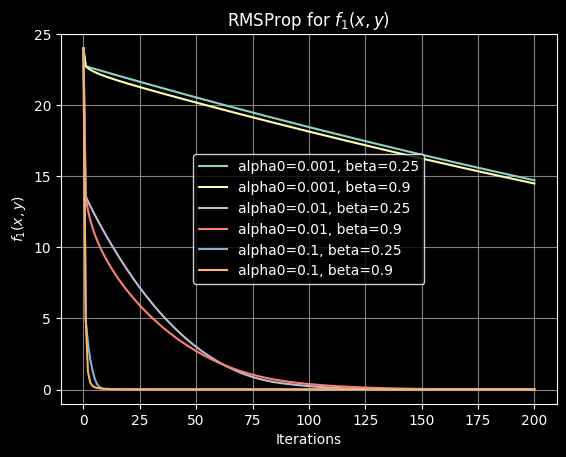

(b)(i) f2


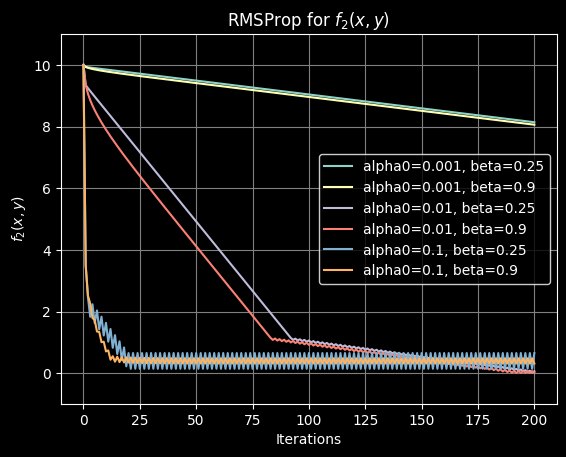

(b)(ii) f1
alpha=0.01, beta=0.25: final_value=1.671755784625396
alpha=0.01, beta=0.9: final_value=8.441146926898956e-06
alpha=0.1, beta=0.25: final_value=2.6519716437885124e-05
alpha=0.1, beta=0.9: final_value=2.587586382172501e-05
alpha=1, beta=0.25: final_value=3.708515478354488e-05
alpha=1, beta=0.9: final_value=5.848881555342564e+229


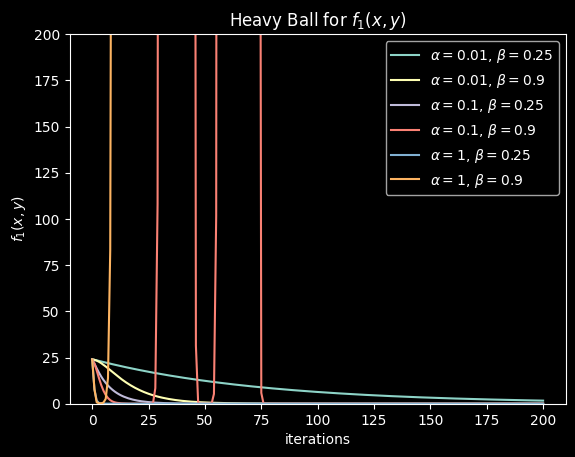

(b)(ii) f2
alpha=0.01, beta=0.25: final_value=1.857964601323141
alpha=0.01, beta=0.9: final_value=1.4053967068700133
alpha=0.1, beta=0.25: final_value=1.3255653850112998
alpha=0.1, beta=0.9: final_value=0.00024469298429430353
alpha=1, beta=0.25: final_value=3.771123954443567e-06
alpha=1, beta=0.9: final_value=6.99190048846646e+35


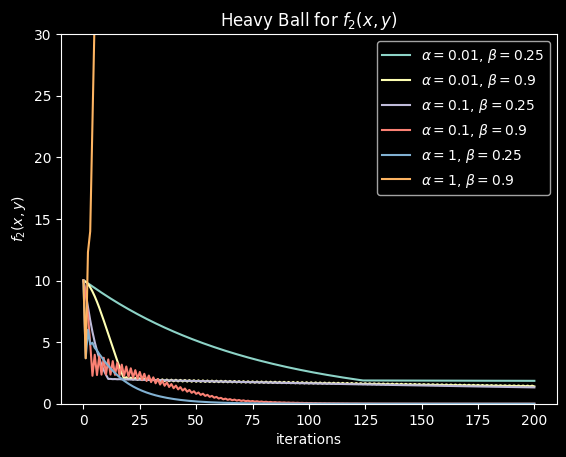

(b)(iii) f1
alpha=0.01, beta1=0.25, beta2=0.9: final_value=0.029751818753794623
alpha=0.01, beta1=0.9, beta2=0.9: final_value=0.0010544092694987287
alpha=0.1, beta1=0.25, beta2=0.9: final_value=0.004175084759306005
alpha=0.1, beta1=0.9, beta2=0.9: final_value=1.111724911005864e-05
alpha=1, beta1=0.25, beta2=0.9: final_value=0.007933238021355532
alpha=1, beta1=0.9, beta2=0.9: final_value=0.00031799642933867065


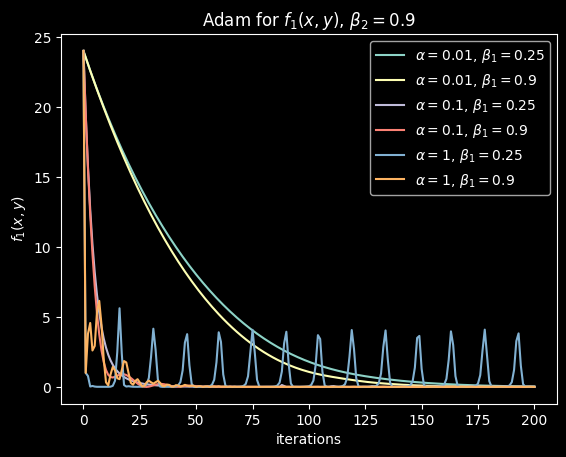

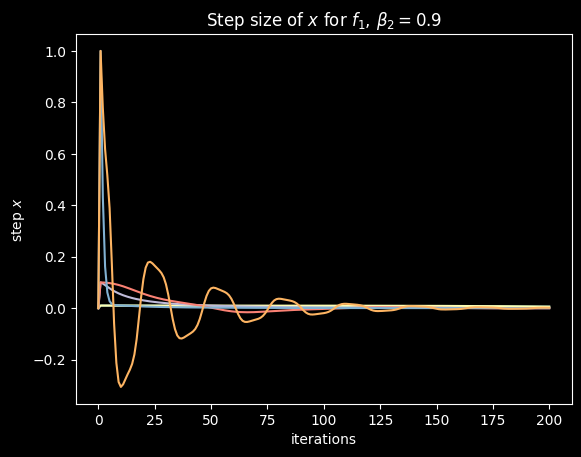

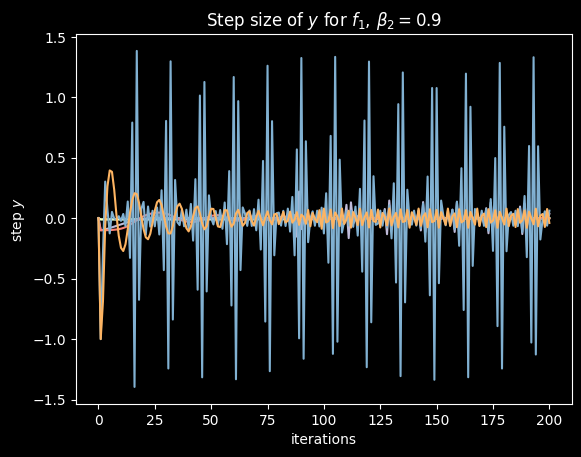

alpha=0.01, beta1=0.25, beta2=0.999: final_value=0.8077530634140225
alpha=0.01, beta1=0.9, beta2=0.999: final_value=0.6481783237270401
alpha=0.1, beta1=0.25, beta2=0.999: final_value=0.0016087986615142182
alpha=0.1, beta1=0.9, beta2=0.999: final_value=6.923977740929222e-05
alpha=1, beta1=0.25, beta2=0.999: final_value=3.7284915640427405
alpha=1, beta1=0.9, beta2=0.999: final_value=3.836192539277868e-08


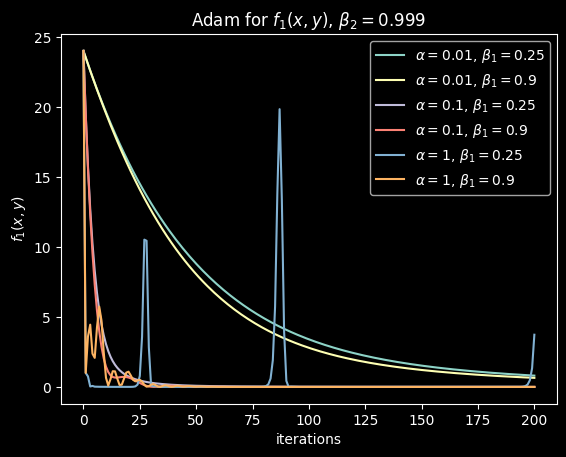

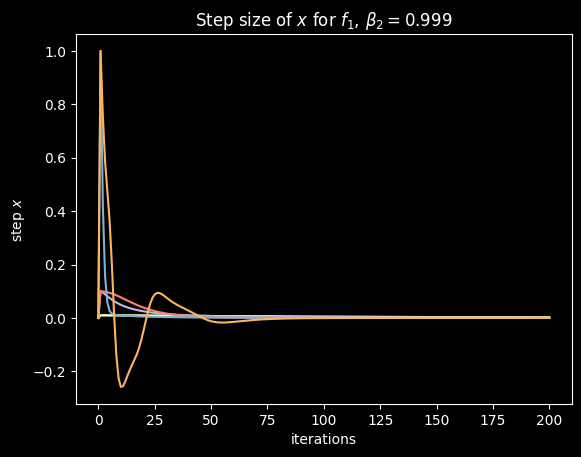

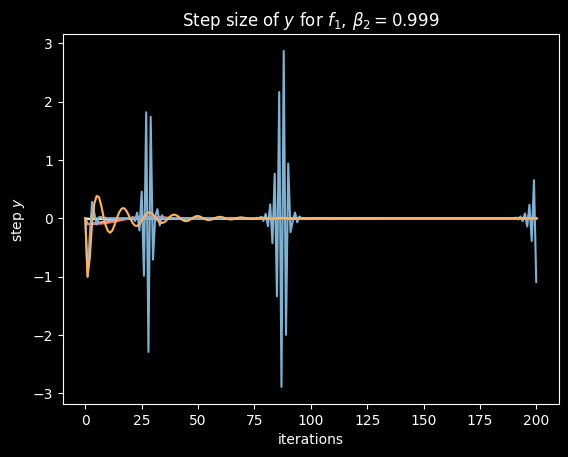

(b)(iii) f2
alpha=0.01, beta1=0.25, beta2=0.9: final_value=0.010666676653317886
alpha=0.01, beta1=0.9, beta2=0.9: final_value=0.019699883487443337
alpha=0.1, beta1=0.25, beta2=0.9: final_value=0.1066665598943306
alpha=0.1, beta1=0.9, beta2=0.9: final_value=0.15774544526664336
alpha=1, beta1=0.25, beta2=0.9: final_value=3.989877007755708
alpha=1, beta1=0.9, beta2=0.9: final_value=0.6723603542110208


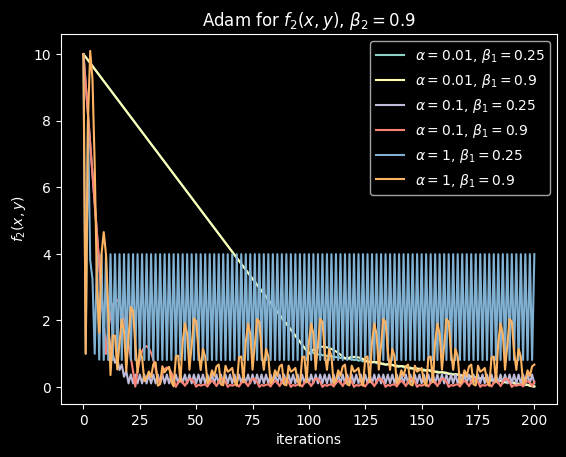

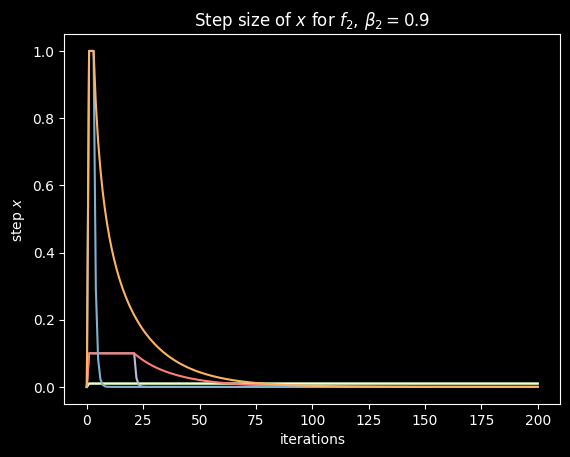

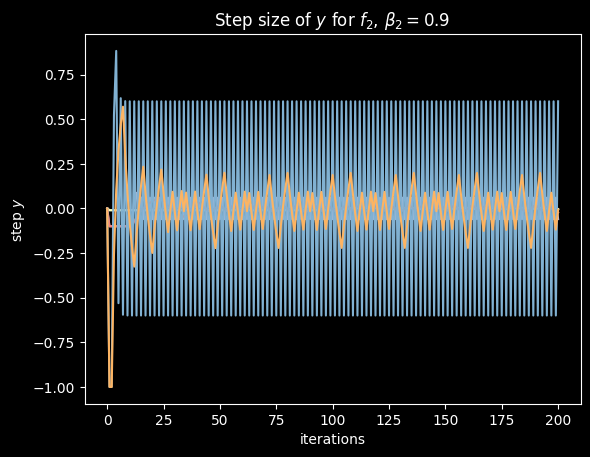

alpha=0.01, beta1=0.25, beta2=0.999: final_value=0.010666676653328544
alpha=0.01, beta1=0.9, beta2=0.999: final_value=0.019699883487446446
alpha=0.1, beta1=0.25, beta2=0.999: final_value=0.10666655989432172
alpha=0.1, beta1=0.9, beta2=0.999: final_value=0.15774544526663625
alpha=1, beta1=0.25, beta2=0.999: final_value=3.9898770077557435
alpha=1, beta1=0.9, beta2=0.999: final_value=0.6723603542109835


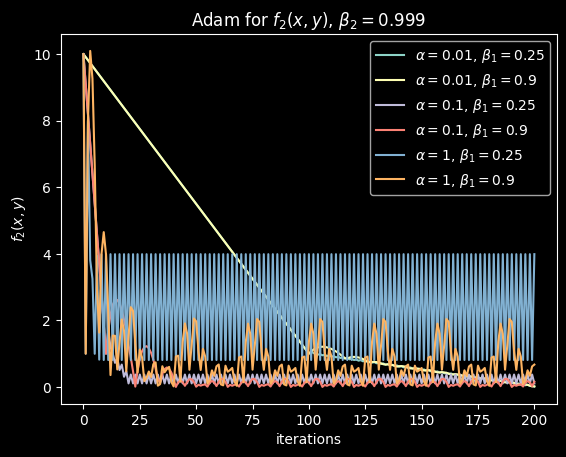

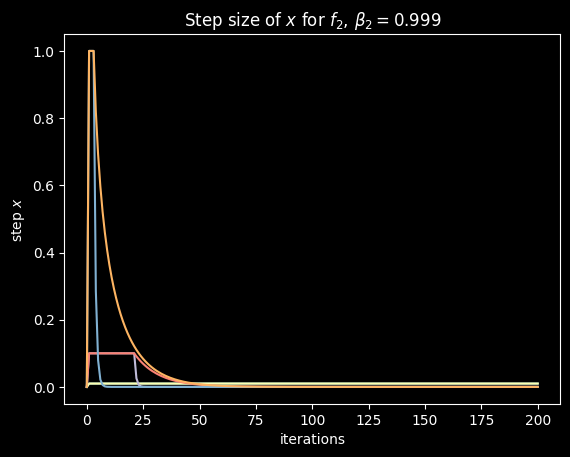

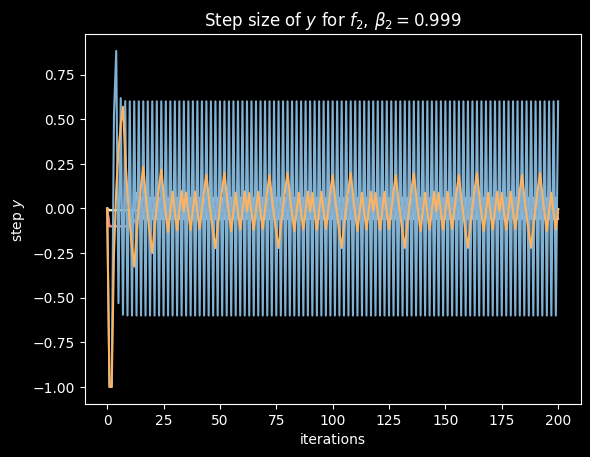

RMSProp (x0=-1): 0
Heavy Ball (x0=-1): 0
Adam (x0=-1): 0


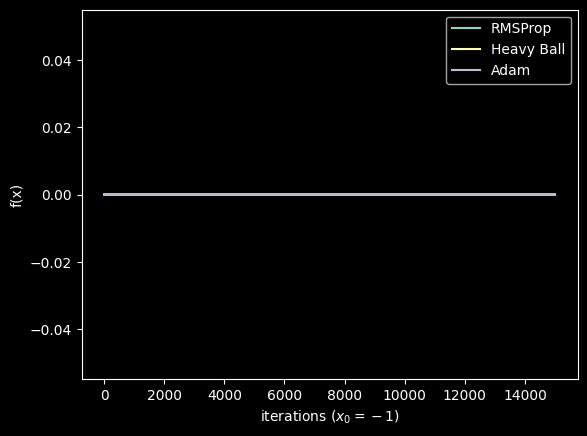

RMSProp (x0=1): 0
Heavy Ball (x0=1): 0
Adam (x0=1): 0


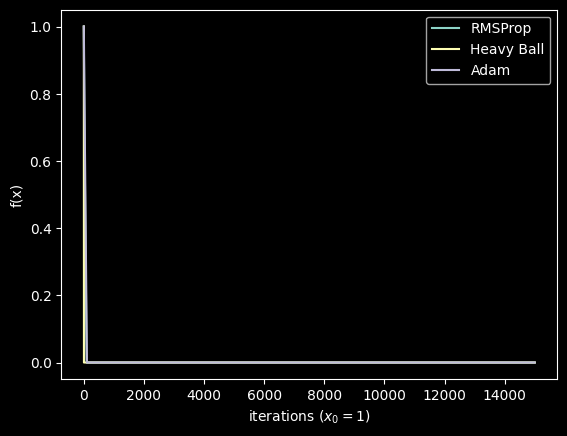

RMSProp (x0=100): 0
Heavy Ball (x0=100): 0
Adam (x0=100): 0


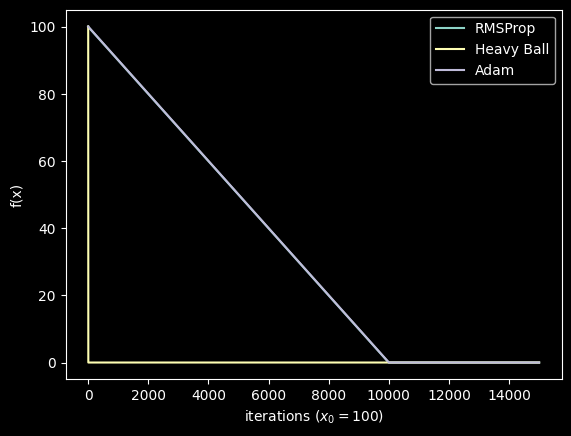

In [46]:
import sympy as sp 
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy

def calculate_derivatives():
    x, y = sp.symbols('x y', real=True)
    # The First Function

    f1 = (1 * ((x - 1) ** 4)) + (8 * ((y - 1) ** 2))
    df1_x = sp.diff(f1, x)
    df1_y = sp.diff(f1, y)
    print(f1)
    print(df1_x)
    print(df1_y)
    # The second Function

    f2 = sp.Max(x - 1, 0) + (8 * sp.Abs(y - 1))
    df2_x = sp.diff(f2, x)
    df2_y = sp.diff(f2, y)
    print(f2)
    print(df2_x)
    print(df2_y)

def polyak(df,x0,f,epsilon = 1e-8):
    # standard code 
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)],[]

    #report
    for _ in range(150):
        count = 0
        for i in range(n):
            count = sum(df[i](x[i])**2)
        step = f(*x) / (count + epsilon)
        for i in range(n):
            x[i] -= step * df[i](x[i])
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(step)
    return x_list, f_list, step_list

def RMSprop(f, df, x0, parameters, iterations=100):
    alpha0, beta = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list ,step_list = [deepcopy(x)], [f(*x)], [[alpha0] * n]
    # defining the constant parameter of epsilon to account for division by zero 
    epsilon = 1e-8
    sums = [0] * n
    alphas = [alpha0] * n
    for _ in range(iterations):
        for i in range(n):
            x[i] -= alphas[i] * df[i](x[i])
            sums[i] = (beta * sums[i]) + ((1 - beta) * (df[i](x[i]) ** 2))
            alphas[i] = alpha0 / ((sums[i] ** 0.5) + epsilon)
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(deepcopy(alphas))
    return x_list, f_list ,step_list

def HeavyBall(f, df, x0, parameters, iterations=100):
    alpha, beta = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], [0]
    # defining the constant parameter of epsilon to account for division by zero 
    epsilon = 1e-8
    z = 0
    for _ in range(iterations):
        
        z = (beta * z) + (alpha * f(*x) / (sum(df[j](x[j]) ** 2 for j in range(n)) + epsilon))
        for i in range(n):
            x[i] -= z * df[i](x[i])
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(z)
    return x_list, f_list, step_list

def Adam(f,df,x0,parameters,iterations=100):
    alpha,beta1,beta2 = parameters
    x = deepcopy(x0)
    n = len(df)
    x_list, f_list, step_list = [deepcopy(x)], [f(*x)], [[0] * n]
    # defining the constant parameter of epsilon to account for division by zero 
    epsilon = 1e-8
    ms = [0] * n
    vs = [0] * n
    step = [0] * n
    t = 0
    for _ in range(iterations):
        t += 1
        for i in range(n):
            ms[i] = (beta1 * ms[i]) + ((1 - beta1) * df[i](x[i]))
            vs[i] = (beta2 * vs[i]) + ((1 - beta2) * (df[i](x[i]) ** 2))
            m_hat = ms[i] / (1 - (beta1 ** t))
            v_hat = vs[i] / (1 - (beta2 ** t))
            step[i] = alpha * (m_hat / ((v_hat ** 0.5) + epsilon))
            x[i] -= step[i]
        x_list.append(deepcopy(x))
        f_list.append(f(*x))
        step_list.append(deepcopy(step))
    return x_list, f_list, step_list

def B1(f, df, x, fnum):
    alpha0s = [0.001, 0.01, 0.1]
    betas = [0.25, 0.9]
    iterations = 200
    iters = list(range(iterations + 1))
    
    plt.figure(facecolor='black')
    plt.xlabel('Iterations', color='white')
    plt.ylabel(f'$f_{fnum}(x,y)$', color='white')
    plt.title(f'RMSProp for $f_{fnum}(x,y)$', color='white')
    plt.grid(color='gray')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    
    all_values = []
    
    for alpha0 in alpha0s:
        for beta in betas:
            xs, values, steps = RMSprop(f, df, x, [alpha0, beta], iterations=iterations)
            plt.plot(iters, values, label=f'alpha0={alpha0}, beta={beta}')  
            all_values.extend(values)  
    
    
    plt.ylim([min(all_values) - 1, max(all_values) + 1])

    
    plt.legend(facecolor='black', edgecolor='white', fontsize='medium')

    plt.show()

def B2(f, df, x, fnum):
    alphas = [0.01,0.1,1]
    betas = [0.25,0.9]
    iterations = 200
    iters = list(range(iterations + 1))
    legend = []
    contour_data = []
    for alpha in alphas:
        for beta in betas:
            xs, values, steps = HeavyBall(f, df, x, [alpha, beta], iterations=iterations)
            legend.append(f'$\\alpha={alpha},\\, \\beta={beta}$')
            print(f'alpha={alpha}, beta={beta}: final_value={values[-1]}')
            plt.plot(iters, values)
    plt.xlabel('iterations')
    plt.ylabel(f'$f_{fnum}(x,y)$')
    plt.title(f'Heavy Ball for $f_{fnum}(x,y)$')
    if fnum == 1: plt.ylim([0, 200])
    else: plt.ylim([0, 30])
    plt.legend(legend)
    plt.show()

def B3(f, df, x, fnum):
    alphas = [0.01, 0.1, 1]
    beta1s = [0.25, 0.9]
    beta2s = [0.9, 0.999]
    iterations = 200
    iters = list(range(iterations + 1))
    legend = []
    for beta2 in beta2s:
        for alpha in alphas:
            for beta1 in beta1s:
                xs, values, steps = Adam(f, df, x, [alpha, beta1, beta2], iterations=iterations)
                legend.append(f'$\\alpha={alpha},\\, \\beta_1={beta1}$')
                print(f'alpha={alpha}, beta1={beta1}, beta2={beta2}: final_value={values[-1]}')
                plt.figure(1)
                plt.plot(iters, values)
                stepsx = [step[0] for step in steps]
                stepsy = [step[1] for step in steps]
                plt.figure(2)
                plt.plot(iters, stepsx)
                plt.figure(3)
                plt.plot(iters, stepsy)
        plt.figure(1)
        plt.xlabel('iterations')
        plt.ylabel(f'$f_{fnum}(x,y)$')
        plt.title(f'Adam for $f_{fnum}(x,y),\\, \\beta_2={beta2}$')
        plt.legend(legend)
        plt.figure(2)
        plt.xlabel('iterations')
        plt.ylabel('step $x$')
        plt.title(f'Step size of $x$ for $f_{fnum},\\, \\beta_2={beta2}$')
        plt.figure(3)
        plt.xlabel('iterations')
        plt.ylabel('step $y$')
        plt.title(f'Step size of $y$ for $f_{fnum},\\, \\beta_2={beta2}$')
        plt.show()

def Question_B():
    f1 = lambda x, y: 1*(x - 1)**4 + 8*(y - 1)**2
    df1_x = lambda x: 4*(x - 1)**3
    df1_y = lambda y: 16*y - 16
    f2 = lambda x, y: 8*abs(y - 1) + max(0, x - 1)
    df2_x = lambda x: np.heaviside(x - 1, 0)
    df2_y = lambda y: 8*np.sign(y - 1)
    print('(b)(i) f1')
    B1(f1, [df1_x, df1_y], [3, 0], 1)
    print('(b)(i) f2')
    B1(f2, [df2_x, df2_y], [3, 0], 2)
    print('(b)(ii) f1')
    B2(f1, [df1_x, df1_y], [3, 0], 1)
    print('(b)(ii) f2')
    B2(f2, [df2_x, df2_y], [3, 0], 2)
    print('(b)(iii) f1')
    B3(f1, [df1_x, df1_y], [3, 0], 1)
    print('(b)(iii) f2')
    B3(f2, [df2_x, df2_y], [3, 0], 2)


def Question_C():
    f = lambda x: max(x, 0)
    df = lambda x: np.heaviside(x, 0)
    num_iters = 150
    #can be changed to 15000 for last answer
    iters = list(range(num_iters + 1))
    for x0 in [-1, 1, 100]:
        _, values, _ = RMSprop(f, [df], [x0], [0.01, 0.9], iterations=num_iters)
        print(f'RMSProp (x0={x0}): {values[-1]}')
        plt.plot(iters, values)
        _, values, _ = HeavyBall(f, [df], [x0], [1, 0.25], iterations=num_iters)
        print(f'Heavy Ball (x0={x0}): {values[-1]}')
        plt.plot(iters, values)
        _, values, _ = Adam(f, [df], [x0], [0.01, 0.9, 0.999], iterations=num_iters)
        print(f'Adam (x0={x0}): {values[-1]}')
        plt.plot(iters, values)
        plt.xlabel(f'iterations ($x_0={x0}$)')
        plt.ylabel('f(x)')
        plt.legend(['RMSProp', 'Heavy Ball', 'Adam'])
        plt.show()


calculate_derivatives()
Question_B()
Question_C()

# ChatGpt Refactor
